# Enhancing Stroke Prevention with Machine Learning: A Business Case for Insurance RPM

Final Group Project For the Machine Learning Course (2767-2425_T3)
Professor Nuno André Inácio Rodrigues Da Silva 

**Group Y**:
- Nicolò Alberto Pellizzari - 63585
- Bastien Gobet - 52255
- Tomás Leite Barbosa Oliveira - 56466
- Drey Tengan - 59840

# Table of Contents

1. [Introduction](#1-introduction)  
2. [Explanatory Data Analysis](#2-explanatory-data-analysis)  
3. [Unsupervised Learning–Clustering](#3-unsupervised-learningclustering)  
4. [Regression models](#4-regression-models)  
5. [Classification Models](#5-classification-models)  
6. [Takeaways and Recommendations](#6-takeaways-and-recommendations)

# 1. Introduction

Stroke is a leading cause of mortality and long-term disability worldwide, imposing significant human and financial costs—particularly on healthcare and insurance systems. Early detection is critical for minimizing these impacts. This report explores how machine learning can support predictive analytics in stroke prevention by estimating individual risk based on clinical indicators such as **age**, **hypertension**, and **heart disease**.

Using a curated and medically grounded dataset, we aim to build models capable of:
- **Classifying** whether a person is at risk of stroke.
- **Predicting** the probability of stroke occurrence as a percentage.
- **Clustering** individuals to discover whether distinct subgroups of patients with similar symptom profiles and risk factors exist—offering potential for more personalized intervention strategies.

The dataset, based on real-world medical references and statistical modeling, provides a rich foundation for training predictive models that are both accurate and interpretable. Each record includes symptoms, comorbidities, and demographic data—enabling robust data-driven decision-making in both clinical and insurance contexts.

---

## Characteristics of the Dataset

- **Balanced Class Distribution**:50% of records represent individuals at risk of stroke; 50% do not—ensuring unbiased model training.

- **Medically Validated Features** : Includes cardiovascular, neurological, and respiratory symptoms validated through clinical sources. So highly explanatory models are expected.

- **Multi-Task Modeling Capability**: Supports classification, regression, and clustering, adaptable to a wide range of ML/DL tools.

---

## Applied Use Case: Insurance & Remote Patient Monitoring (RPM)

For **insurance companies**, integrating stroke prediction models into **Remote Patient Monitoring (RPM)** systems offers strategic benefits:

- Real-time tracking of risk factors through wearable and digital health devices.
- Early identification of at-risk individuals, enabling timely interventions.
- Reduction in long-term healthcare and claim costs through preventive care strategies.

RPM can be particularly effective for patients with chronic symptoms—encouraging adoption of smart monitoring tools. For others, targeted awareness efforts (e.g., during check-ups or through informational materials) can be triggered once a certain risk threshold is reached. This personalized, data-informed approach enhances preventive healthcare and supports better policyholder outcomes.

---

## Data Source

**Mahatir Ahmed Tusher**. (2025). *Stroke Risk Prediction Dataset Based on Symptoms* [Data set]. Kaggle.  
🔗 [https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset](https://www.kaggle.com/datasets/mahatiratusher/stroke-risk-prediction-dataset)  
📄 DOI: [https://doi.org/10.34740/KAGGLE/DSV/10754870](https://doi.org/10.34740/KAGGLE/DSV/10754870)

---

By applying machine learning to this medically inspired dataset, we seek to support **proactive clinical decisions**, **strategic insurance planning**, and **personalized risk profiling** through clustering and prediction—ultimately helping reduce the burden of stroke through early detection and targeted prevention.

In [6]:
# Managing Working Directory
# ---------------------------------------------
import os

# ---------------------------------------------
# Data Handling and Numerical Computation
# ---------------------------------------------
import numpy as np
import pandas as pd

# ---------------------------------------------
# Data Visualization
# ---------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# Statistical Modeling
# ---------------------------------------------
import statsmodels.api as sm
from scipy.stats import randint, uniform
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ---------------------------------------------
# Clustering and Dimensionality Reduction
# ---------------------------------------------
import fastcluster
from scipy.cluster import hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# ---------------------------------------------
# Preprocessing
# ---------------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    FunctionTransformer, LabelEncoder, OneHotEncoder, StandardScaler
)

# ---------------------------------------------
# Model Selection and Evaluation
# ---------------------------------------------
from sklearn.metrics import (
    ConfusionMatrixDisplay, accuracy_score, auc, classification_report,
    confusion_matrix, davies_bouldin_score, mean_squared_error,
    precision_score, r2_score, recall_score, roc_curve, silhouette_score
)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

# ---------------------------------------------
# Machine Learning Models
# ---------------------------------------------
from sklearn.ensemble import (
    GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

# ---------------------------------------------
# Fairness in Machine Learning
# ---------------------------------------------
from fairlearn.metrics import (
    MetricFrame, demographic_parity_difference, equalized_odds_difference
)
from fairlearn.reductions import DemographicParity, ExponentiatedGradient

# ---------------------------------------------
# Model Interpretability
# ---------------------------------------------
import lime
import lime.lime_tabular
import shap
from sklearn.inspection import permutation_importance

# ---------------------------------------------
# Feature Selection
# ---------------------------------------------
from sklearn.feature_selection import VarianceThreshold


In [7]:
os.chdir('/Users/tomasoliveira/Downloads/Machine Learning')

In [8]:
df = pd.read_csv('stroke_risk_dataset.csv')
df.head()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


# 2. Explanatory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

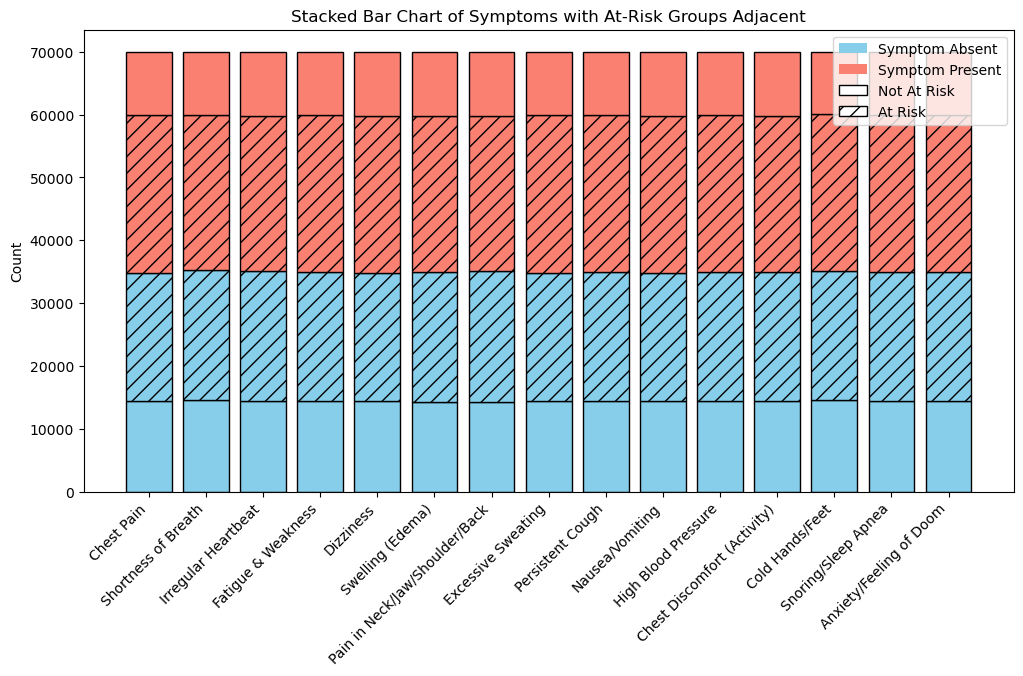

In [11]:
# Define symptoms
symptoms = df.columns[0:15]  # Exclude target variable

# Count occurrences for each symptom based on risk
counts = {}
for symptom in symptoms:
    counts[symptom] = df.groupby([symptom, 'At Risk (Binary)']).size().unstack(fill_value=0)

# Plot settings
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors and hatches
colors = {0: 'skyblue', 1: 'salmon'}
hatches = {0: '', 1: '//'}

# Stacked bars with reordered stacking order
for i, symptom in enumerate(symptoms):
    bottom = 0
    for (symptom_value, risk_value) in [(0, 0), (0, 1), (1, 1), (1, 0)]:  # New stacking order
        height = counts[symptom].loc[symptom_value, risk_value]
        bar = ax.bar(i, height, color=colors[symptom_value], 
                     hatch=hatches[risk_value], edgecolor='black', bottom=bottom)
        bottom += height

# Labels and legend
ax.set_xticks(range(len(symptoms)))
ax.set_xticklabels(symptoms, rotation=45, ha="right")
ax.set_ylabel("Count")
ax.set_title("Stacked Bar Chart of Symptoms with At-Risk Groups Adjacent")

# Custom legend
from matplotlib.patches import Patch
legend_patches = [
    Patch(facecolor='skyblue', label='Symptom Absent'),
    Patch(facecolor='salmon', label='Symptom Present'),
    Patch(facecolor='white', edgecolor='black', hatch='', label='Not At Risk'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='At Risk')
]
ax.legend(handles=legend_patches, loc='upper right')

# Save the plot as a JPG file
# plt.savefig('symptoms_vs_at_risk.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()

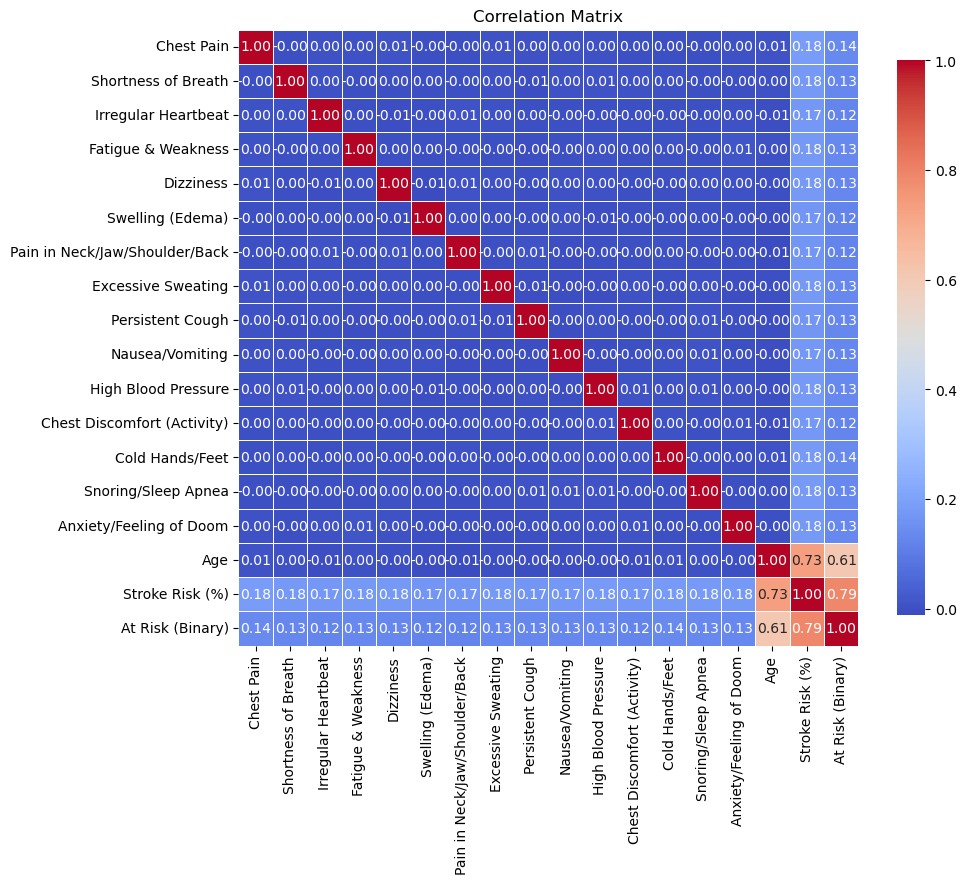

In [12]:
# Correlation Matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

# Call heatmap to visualise
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={"shrink": 0.9})

plt.title('Correlation Matrix')

# plt.savefig('corr_matrix.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()

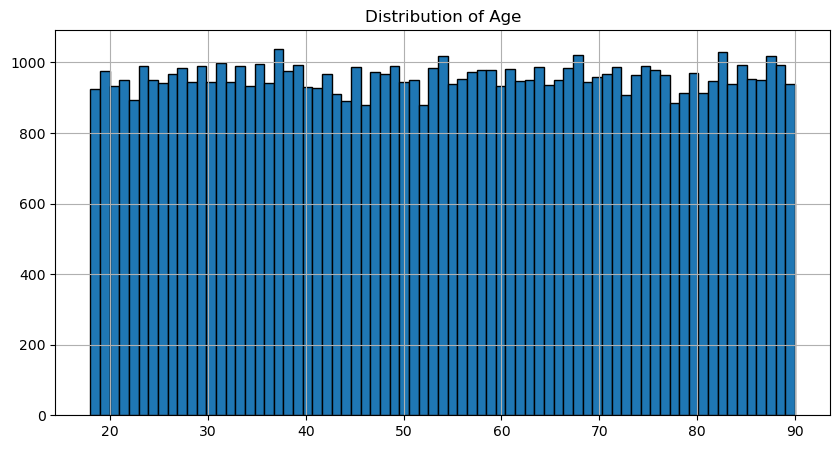

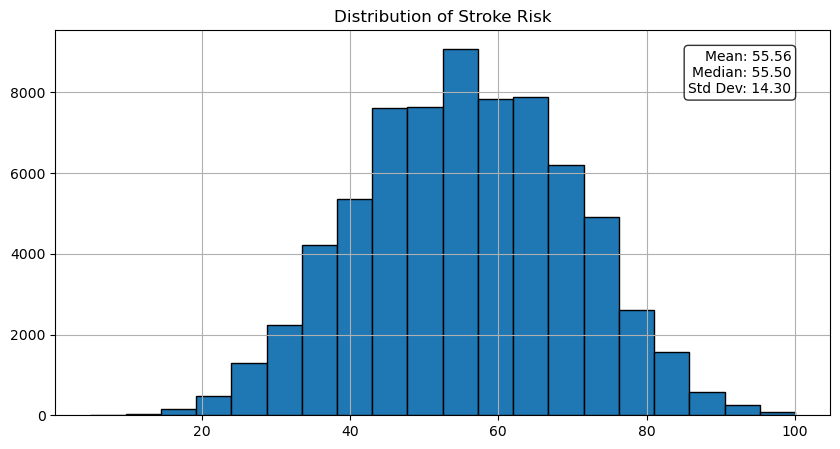

In [13]:
# Plot histograms
age_range = df['Age'].max() - df['Age'].min() + 1
df['Age'].hist(figsize=(10, 5), bins=age_range, edgecolor="black")
plt.title("Distribution of Age")
# plt.savefig('age.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

sr_range = len(df['Stroke Risk (%)'].unique()) + 6
df['Stroke Risk (%)'].hist(figsize=(10,5), bins=20, edgecolor="black")
plt.title("Distribution of Stroke Risk")

# Calculate key statistics
mean_value = df['Stroke Risk (%)'].mean()
median_value = df['Stroke Risk (%)'].median()
std_dev = df['Stroke Risk (%)'].std()

# Add a floating box with key stats
textstr = f"Mean: {mean_value:.2f}\nMedian: {median_value:.2f}\nStd Dev: {std_dev:.2f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right', bbox=props)

# Save the plot as a JPG file
# plt.savefig('stroke_risk.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

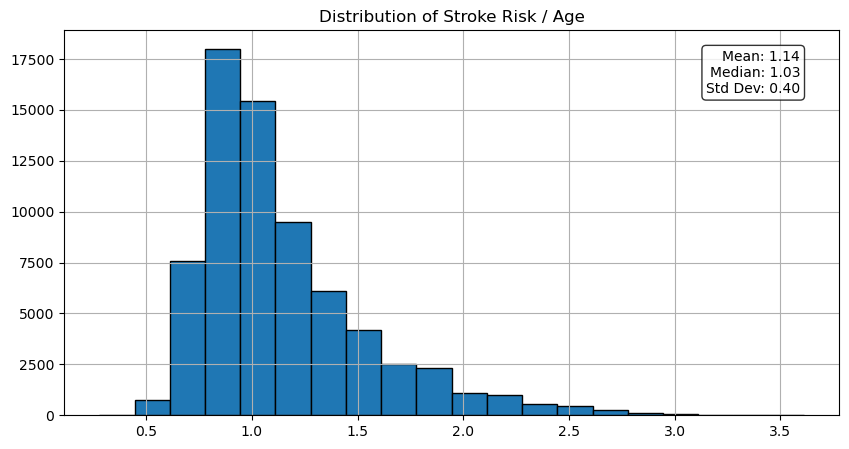

In [14]:
df['Age Scaled Stroke Risk'] = df['Stroke Risk (%)'] / df['Age']

df['Age Scaled Stroke Risk'].hist(figsize=(10,5), bins=20, edgecolor="black")
plt.title("Distribution of Stroke Risk / Age")

# Calculate key statistics
mean_value = df['Age Scaled Stroke Risk'].mean()
median_value = df['Age Scaled Stroke Risk'].median()
std_dev = df['Age Scaled Stroke Risk'].std()

# Add a floating box with key stats
textstr = f"Mean: {mean_value:.2f}\nMedian: {median_value:.2f}\nStd Dev: {std_dev:.2f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right', bbox=props)

# Save the plot as a JPG file
# plt.savefig('age_adj_stroke_risk.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/w0/tqf0c9910nzd7p3rx1yzkssh0000gn/T/ipykernel_70150/3126680178.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_copy["Age Group"], y=df_copy["Stroke Risk (%)"], palette="coolwarm")


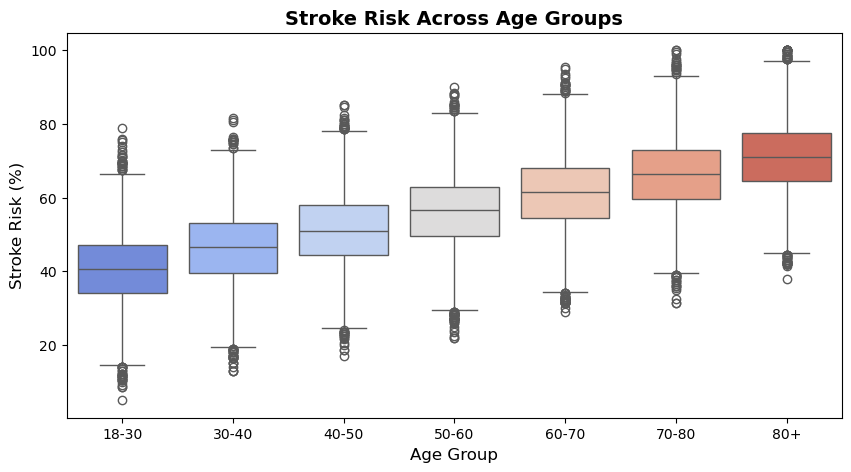

In [15]:
# Create age bins
df_copy = df.copy()
df_copy["Age Group"] = pd.cut(df_copy["Age"], bins=[18, 30, 40, 50, 60, 70, 80, 100], labels=["18-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80+"], include_lowest=True )

# Boxplot of stroke risk across age groups
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_copy["Age Group"], y=df_copy["Stroke Risk (%)"], palette="coolwarm")

plt.title("Stroke Risk Across Age Groups", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Stroke Risk (%)", fontsize=12)
plt.show()

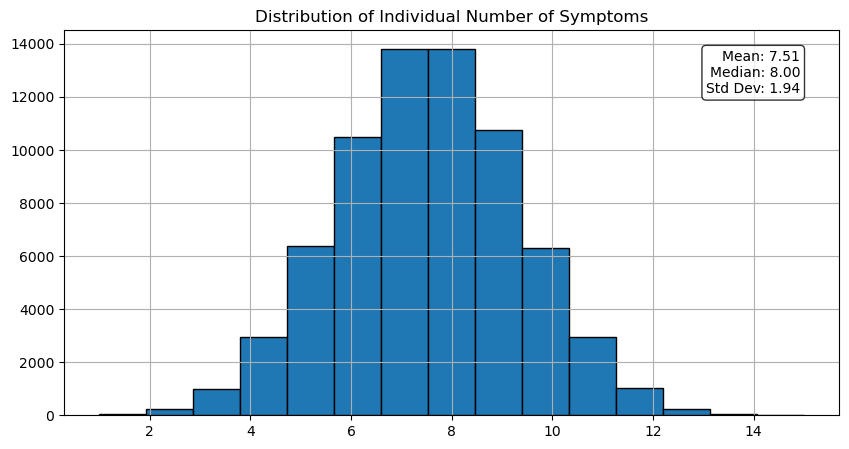

In [16]:
df['Number of Symptoms'] = df.iloc[:, :15].sum(axis=1)

df['Number of Symptoms'].hist(figsize=(10,5), bins=15, edgecolor="black")
plt.title("Distribution of Individual Number of Symptoms")

# Calculate key statistics
mean_value = df['Number of Symptoms'].mean()
median_value = df['Number of Symptoms'].median()
std_dev = df['Number of Symptoms'].std()

# Add a floating box with key stats
textstr = f"Mean: {mean_value:.2f}\nMedian: {median_value:.2f}\nStd Dev: {std_dev:.2f}"
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right', bbox=props)

# Save the plot as a JPG file
# plt.savefig('number_symptoms.jpg', format='jpg', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/w0/tqf0c9910nzd7p3rx1yzkssh0000gn/T/ipykernel_70150/2584704232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_copy["At Risk (Binary)"], y=df_copy["Stroke Risk (%)"], palette="coolwarm")


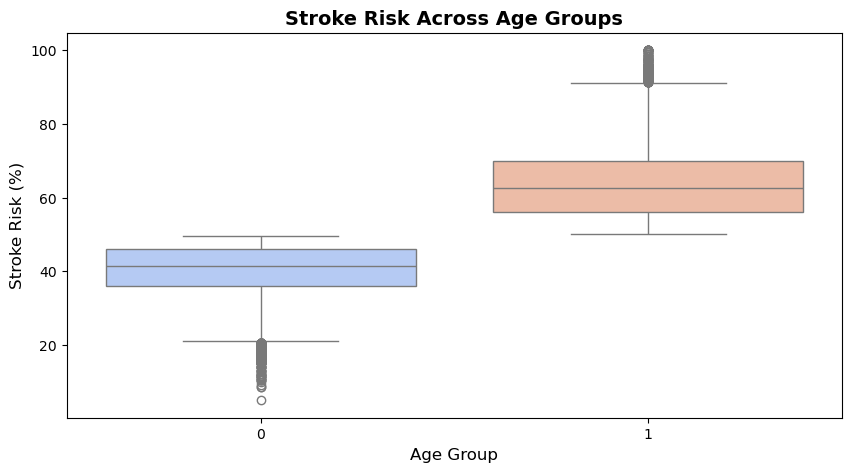

In [17]:
# Boxplot of stroke risk across age groups
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_copy["At Risk (Binary)"], y=df_copy["Stroke Risk (%)"], palette="coolwarm")

plt.title("Stroke Risk Across Age Groups", fontsize=14, fontweight="bold")
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Stroke Risk (%)", fontsize=12)
plt.show()

# 3. Unsupervised Learning-Clustering

1. Feature selection and preprocessing
2. PCA
3. Choosing the right K value for K-Means according to Elbow Method, mean silouhette score and Hierarchical Clustering
5. Are the clusters well-defined? Interpretation of the clusters


In [20]:
#Step 1 - Data selection and preprocessing WITH NUMBER OF SYMPTOMS AND AGE GROUPS ADDED


# Copy the dataset
X = df.copy()

# Convert 'Age' into categorical bins (Age Group) and exclude the original 'Age'
X["Age Group"] = pd.cut(X["Age"], 
                        bins=[18, 30, 40, 50, 60, 70, 80, 100], 
                        labels=["18-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80+"], 
                        include_lowest=True)

# Define features for clustering (exclude 'Stroke Risk (%)', 'At Risk (Binary)', and 'KMeans_Cluster')
excluded_targets = ["Stroke Risk (%)", "At Risk (Binary)", "KMeans_Cluster", "Age", "Number of Symptoms"]
features = [col for col in X.columns if col not in excluded_targets]

X = X[features]  # Keep only selected features


# One-hot encode 'Age Group' (no need for standardization)
X = pd.get_dummies(X, columns=["Age Group"], drop_first=True)

# Add the 'Number of Symptoms' feature (sum of all symptoms)
X['Number of Symptoms'] = X.drop(columns=['Age Group_30-40', 'Age Group_40-50', 'Age Group_50-60', 'Age Group_60-70', 'Age Group_70-80', 'Age Group_80+']).sum(axis=1)

print(f"Shape before Feature Selection: {X.shape}")  # Check shape before selection

# Feature Selection (Remove Low-Variance Features)
selector = VarianceThreshold(threshold=0.05)
X_selected = selector.fit_transform(X)

# Get the selected feature names (after removal)
selected_features = X.columns[selector.get_support()]

print(f"Selected Features: {list(selected_features)}")
print(f"Shape after Feature Selection: {X_selected.shape}")  # Check shape after removal

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_selected, columns=selected_features)

# Check results
print("Final Processed Data Shape:", X_scaled_df.shape)


Shape before Feature Selection: (70000, 23)
Selected Features: ['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat', 'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)', 'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating', 'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure', 'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea', 'Anxiety/Feeling of Doom', 'Age Scaled Stroke Risk', 'Age Group_30-40', 'Age Group_40-50', 'Age Group_50-60', 'Age Group_60-70', 'Age Group_70-80', 'Age Group_80+', 'Number of Symptoms']
Shape after Feature Selection: (70000, 23)
Final Processed Data Shape: (70000, 23)


In [21]:
#Step 1 - Data selection and preprocessing WITHOUT NUMBER OF SYMPTOS AND AGE GROUPS BUT INCLUDING AGE 

# from sklearn.feature_selection import VarianceThreshold
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# # Copy the dataset
# X = df.copy()

# # Define features for clustering (exclude 'Stroke Risk (%)', 'At Risk (Binary)', 'KMeans_Cluster', and 'Number of Symptoms')
# excluded_targets = ["Stroke Risk (%)", "At Risk (Binary)", "KMeans_Cluster", "Number of Symptoms", "Age Group"]
# features = [col for col in X.columns if col not in excluded_targets]

# X = X[features]  # Keep only selected features

# # Standardize 'Age' (because it's a continuous variable)
# scaler = StandardScaler()
# X['Age'] = scaler.fit_transform(X[['Age']])  # Standardize 'Age'

# print(f"Shape before Feature Selection: {X.shape}")  # Check shape before selection

# # Feature Selection (Remove Low-Variance Features)
# selector = VarianceThreshold(threshold=0.05)
# X_selected = selector.fit_transform(X)

# # Get the selected feature names (after removal)
# selected_features = X.columns[selector.get_support()]

# print(f"Selected Features: {list(selected_features)}")
# print(f"Shape after Feature Selection: {X_selected.shape}")  # Check shape after removal

# # Convert back to DataFrame
# X_scaled_df = pd.DataFrame(X_selected, columns=selected_features)

# # Check results
# print("Final Processed Data Shape:", X_scaled_df.shape)

In [22]:
#Step 2 - PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled_df)

# Convert PCA-transformed data to a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Check how many components were selected
print("Number of PCA components:", pca.n_components_)

print(f"Explained variance: {pca.explained_variance_ratio_.sum():.2f}")


Explained Variance Ratio: [0.54286735 0.02701421 0.02696393 0.02692654 0.02688647 0.02681757
 0.02667775 0.02660883 0.0265578  0.0264713  0.02641959 0.02624739
 0.02619982 0.02606205 0.02596305 0.01832507 0.01467062 0.01459285]
Number of PCA components: 18
Explained variance: 0.96


18 dimensions after PCA – PCA does not reduce dimensions significantly (only 4 less). If we try to choose n_components = 2 or = 3, then <.60 of the variance is explained. This means that the dataset has **high-dimensional complexity**, and reducing it to 2 or 3 components does not sufficiently capture the variance in the data. Since PCA selects components that maximize variance, the fact that **18 components** are required to retain most of the information suggests that:

- The features are mostly independent – There is little redundancy in the binary variables, meaning most features contribute unique information.
- Using PCA for visualization may be misleading – Since the first two or three components explain very little variance, plotting clusters in 2D or 3D PCA space might not reflect the actual separation in the original feature space.
- Dimensionality reduction may not be useful for this dataset – Unlike datasets where PCA dramatically reduces dimensionality while preserving variance, here it retains nearly all dimensions, indicating that each feature holds important information.
- **Conclusion**: PCA does not offer sufficient dimensionality reduction for this dataset. It may not be the best choice for simplifying the data while retaining important information. 


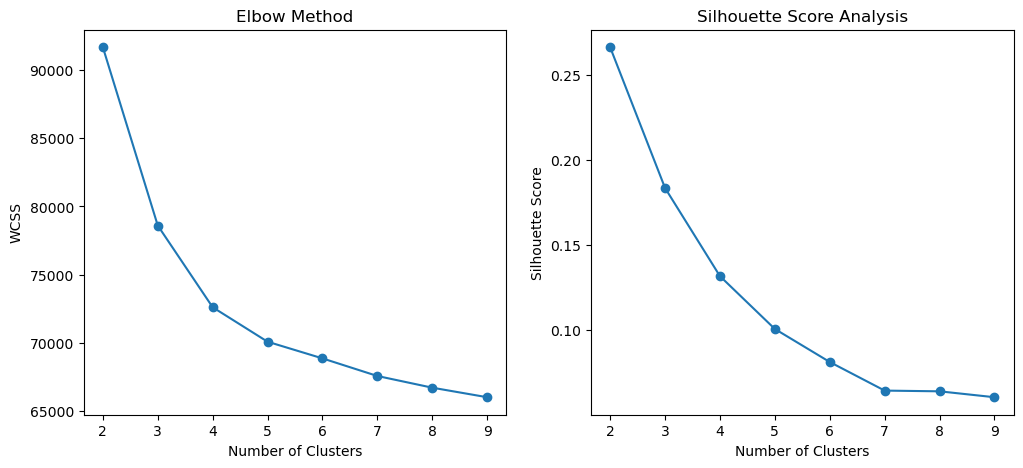

In [24]:
# Step 3 - CHoosing the right value for K

#Since the code takes a really long time to run and the dataset is balanced (not many outliers), let's run the K-means on a sample for the sake of speed

sample_size = 15000  # Adjust as needed
X_scaled_sample = X_scaled_df.sample(n=sample_size, random_state=42)  

# Elbow Method
wcss = []
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")  
    kmeans.fit(X_scaled_sample)  
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled_sample, kmeans.labels_)) 

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")

plt.show()



In [25]:
# import scipy.cluster.hierarchy as sch
# import matplotlib.pyplot as plt


# # Create Dendrogram
# plt.figure(figsize=(10, 5))
# sch.dendrogram(sch.linkage(X_scaled_sample, method="ward"))
# plt.title("Hierarchical Clustering Dendrogram")
# plt.xlabel("Data Points")
# plt.ylabel("Distance")
# plt.show()


The cell above takes a really long tume to run, so please run the cell below using fastcluster module

In [27]:
!pip install fastcluster

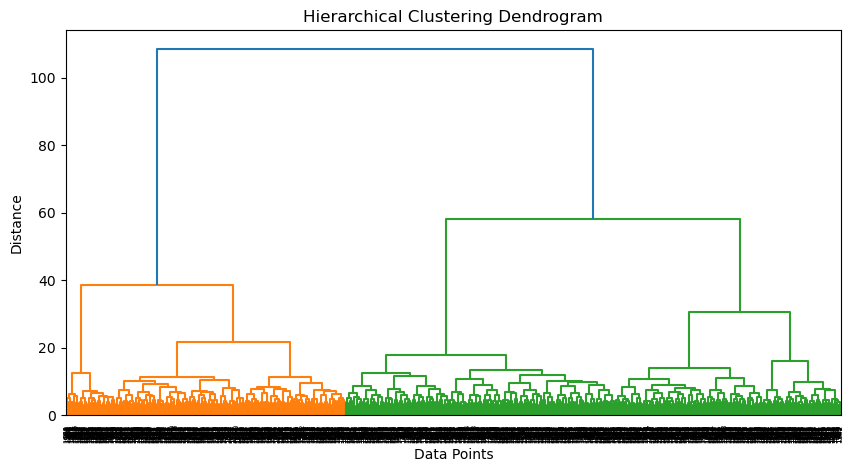

In [28]:


# Ensure X_scaled_sample is not too large (subsample if needed)
if X_scaled_sample.shape[0] > 2000:  # Adjust sample size limit as needed
    X_scaled_sample = X_scaled_sample.sample(n=2000, random_state=42)

# Compute linkage matrix with fastcluster
linkage_matrix = fastcluster.linkage_vector(X_scaled_sample, method="ward")

# Plot Dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


Based on the results from multiple clustering validation techniques, the optimal number of clusters is **K = 3**. 

1. **Hierarchical Clustering (Dendrogram)**: 
   The dendrogram suggests that cutting at a **higher distance (90-100)** results in **two distinct clusters**, indicating a simpler structure. However, cutting at a **lower distance (40-45)** gives us **three clusters**, which provides a more detailed and meaningful separation of the data. While **K = 2** might oversimplify the structure by merging distinct subgroups, **K = 3** seems to capture more of the inherent complexity of the dataset, with well-separated clusters that still maintain cohesion.


2. **Elbow Method**:
   The Elbow Method supports **K = 3**, showing a sharp drop in WCSS from **K = 2 to K = 3**. After **K = 3**, the decrease in WCSS becomes more gradual, suggesting that adding more clusters does not significantly improve compactness or clustering quality. Thus, **K = 3** strikes the best balance between reducing the variance and not over-complicating the model.

3. **Silhouette Score Analysis**:
   The **Silhouette Score** for **K = 3** indicates moderate separation between the clusters (~0.08), suggesting that the clusters are distinguishable while maintaining reasonable cohesion. **K = 2**, though it has a slightly higher silhouette score, would oversimplify the clustering, potentially merging distinct subgroups. Increasing **K** beyond 3 reduces the silhouette score, indicating that additional clusters introduce overlap rather than improving separation.

Conclusion:

While **K = 2** is suggested by the **Hierarchical Clustering Dendrogram**, it may oversimplify the dataset, merging potentially meaningful distinctions. **K = 3**, on the other hand, provides a **distant enough separation**, offering a better balance between compactness, separation, and interpretability. The results from the Elbow Method and Silhouette Score Analysis also support **K = 3** as the optimal choice, ensuring that the clusters are well-defined, meaningful, and interpretable.


In [30]:
# Set the number of clusters
k = 3

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled_df)  # Assign clusters

# Check cluster counts
print(df["KMeans_Cluster"].value_counts())


KMeans_Cluster
1    27895
0    22593
2    19512
Name: count, dtype: int64


In [31]:
# Create 'Age Group' based on the 'Age' feature
df["Age Group"] = pd.cut(df["Age"], 
                        bins=[18, 30, 40, 50, 60, 70, 80, 100], 
                        labels=["18-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80+"], 
                        include_lowest=True)



# Add the 'Number of Symptoms' feature by summing binary symptom columns
df['Number of Symptoms'] = df.drop(columns=['Age Group', "Stroke Risk (%)", "At Risk (Binary)", "KMeans_Cluster", "Age"]).sum(axis=1)

# Group by 'KMeans_Cluster' and calculate the mean for numeric columns only
cluster_means = df.drop(columns=['Age Group']).groupby(by="KMeans_Cluster").mean()

# Show the result
cluster_means



,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary),Age Scaled Stroke Risk,Number of Symptoms
KMeans_Cluster,,,,,,,,,,,,,,,,,,,,
0,0.648121,0.641924,0.645465,0.644182,0.647944,0.639313,0.641747,0.644979,0.640774,0.647147,0.648033,0.643385,0.646129,0.649139,0.641216,51.988713,65.341145,0.878104,1.432085,20.771084
1,0.492239,0.487901,0.486897,0.493601,0.496397,0.497258,0.495859,0.498225,0.496756,0.493780,0.492239,0.492526,0.485392,0.490948,0.494175,53.926295,54.934110,0.651586,1.116108,15.904493
2,0.346300,0.340303,0.346300,0.342558,0.344762,0.344608,0.338868,0.347837,0.344506,0.345480,0.341995,0.343071,0.347632,0.342712,0.344352,56.636685,45.124769,0.380740,0.840946,11.163517


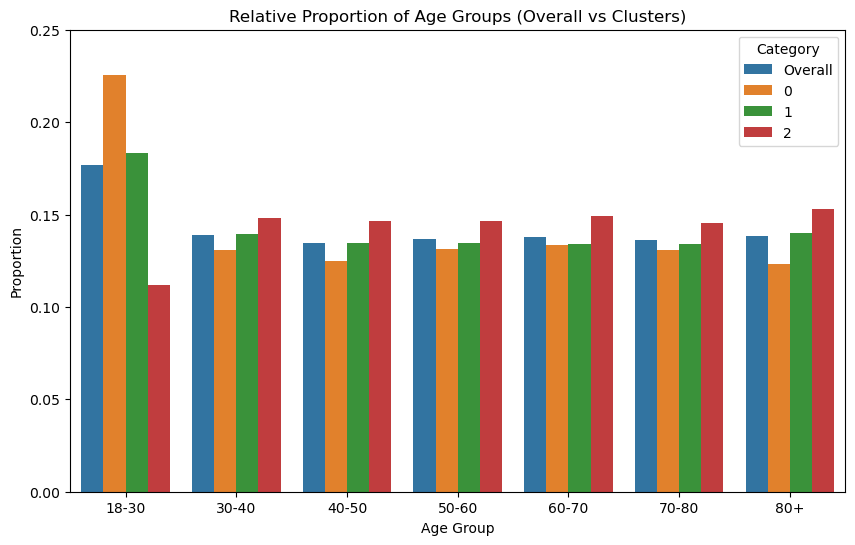

In [32]:
# Calculate overall age group proportions
age_group_counts = df['Age Group'].value_counts(normalize=True).rename('Overall').reset_index()
age_group_counts.rename(columns={'index': 'Age Group'}, inplace=True)

# Calculate age group proportions within each cluster
cluster_counts = df.groupby('KMeans_Cluster')['Age Group'].value_counts(normalize=True).rename('Proportion').reset_index()

# Pivot to wide format for easy plotting
cluster_pivot = cluster_counts.pivot(index='Age Group', columns='KMeans_Cluster', values='Proportion').reset_index()

# Merge overall proportions
final_df = age_group_counts.merge(cluster_pivot, on='Age Group', how='left')

# Melt for seaborn barplot
plot_df = final_df.melt(id_vars=['Age Group'], var_name='Category', value_name='Proportion')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Age Group', y='Proportion', hue='Category')

# Customize
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.title('Relative Proportion of Age Groups (Overall vs Clusters)')
plt.legend(title='Category') #, labels=['Overall'] + [f'Cluster {i}' for i in sorted(df["KMeans_Cluster"].unique())], hue='Category')
plt.ylim(0, .25)

plt.savefig('clusters_by_age.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


/var/folders/w0/tqf0c9910nzd7p3rx1yzkssh0000gn/T/ipykernel_70150/1378816011.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overall_avg = df.groupby('Age Group')['Stroke Risk (%)'].mean().rename('Overall').reset_index()
/var/folders/w0/tqf0c9910nzd7p3rx1yzkssh0000gn/T/ipykernel_70150/1378816011.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_avg = df.groupby(['KMeans_Cluster', 'Age Group'])['Stroke Risk (%)'].mean().rename('Cluster Avg').reset_index()


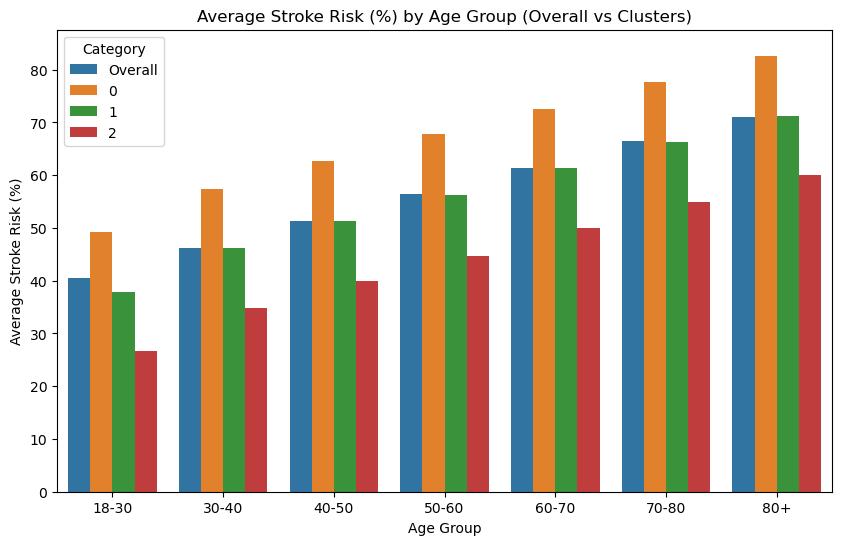

In [33]:
# Calculate the average Stroke Risk % for the overall group
overall_avg = df.groupby('Age Group')['Stroke Risk (%)'].mean().rename('Overall').reset_index()

# Calculate the average Stroke Risk % for each cluster
cluster_avg = df.groupby(['KMeans_Cluster', 'Age Group'])['Stroke Risk (%)'].mean().rename('Cluster Avg').reset_index()

# Pivot the cluster averages for easier comparison
cluster_avg_pivot = cluster_avg.pivot(index='Age Group', columns='KMeans_Cluster', values='Cluster Avg').reset_index()

# Merge overall averages with cluster averages
final_avg_df = overall_avg.merge(cluster_avg_pivot, on='Age Group', how='left')

# Display the result
# Melt the final_avg_df for easier plotting
plot_avg_df = final_avg_df.melt(id_vars=['Age Group'], var_name='Category', value_name='Average Stroke Risk (%)')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_avg_df, x='Age Group', y='Average Stroke Risk (%)', hue='Category')

# Customize
plt.xlabel('Age Group')
plt.ylabel('Average Stroke Risk (%)')
plt.title('Average Stroke Risk (%) by Age Group (Overall vs Clusters)')
plt.legend(title='Category')
plt.ylim(0, final_avg_df.iloc[:, 1:].max().max() + 5)  # Adjust y-axis limit for better visualization

plt.savefig('cluster_stroke_risk.jpg', format='jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

Cluster Interpretation:

**Cluster 0**:

 - High symptoms: Individuals report the highest average symptoms, with significant levels of chest pain (0.6075), shortness of breath (0.6010), and swelling (0.6029).
 - High stroke risk: Average stroke risk is 63.38%.
 - At Risk (Binary): High proportion of individuals at risk (0.85).

**Cluster 1**:

 - Low symptoms: Individuals report the lowest chest pain (0.2945), shortness of breath (0.2906), and other symptoms.
 - Low stroke risk: Average stroke risk is 40.35%, which is the lowest of the clusters.
 - At Risk (Binary): Low proportion of individuals at risk (0.25).

**Cluster 2**:

 - Moderate symptoms: Individuals report moderate chest pain (0.4393), shortness of breath (0.4347), and swelling (0.4396).
 - Moderate stroke risk: Average stroke risk is 50.87%.
 - At Risk (Binary): Moderate proportion of individuals at risk (0.53).
 
*Key Takeaways*:
Cluster 0: High health concerns, frequent symptoms, and high stroke risk.
Cluster 1: Low health concerns, minimal symptoms, and low stroke risk.
Cluster 2: Moderate health concerns, moderate symptoms, and stroke risk.

# 4. Regression models

Predicting the risk of experiencing a stroke is a critical challenge in healthcare, where early intervention can make a significant difference in patient outcomes.

This model aims to predict the percentage probability of experiencing a stroke by analyzing multiple contributing factors. Rather than providing a simple yes or no answer, it offers a continuous probability score, allowing for a more personalized and precise risk assessment. 

This approach can help individuals and healthcare providers better understand the likelihood of a stroke occurring and take proactive steps accordingly.

## Linear regression

To achieve this, we first implemented a **Linear Regression model**, a statistical method that establishes a direct relationship between input features and stroke risk. This model assumes that the risk of stroke can be estimated as a weighted sum of contributing factors, making it highly interpretable and easy to analyze.

The dataset includes both continuous variables (e.g., age) and binary indicators (e.g., presence of symptoms like dizziness or shortness of breath). By using this approach, we aim to provide a transparent and explainable prediction tool that can help both healthcare professionals and individuals assess stroke risk.

In [64]:
df_regr = df.copy()

# Define features (X) and target (y)
X = df_regr.drop(columns=[ "Stroke Risk (%)", "At Risk (Binary)", "Age Scaled Stroke Risk", "Number of Symptoms", "KMeans_Cluster", "Age Group" ])
y = df_regr["Stroke Risk (%)"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with Linear Regression
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # Standardize Age
    ('model', LinearRegression())  # Simple linear regression
])

# Train the model
pipeline_lr.fit(X_train, y_train)

# Predictions
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr:.2f}")
print(f"Linear Regression - R² Score: {r2_lr:.4f}")

Linear Regression - Mean Squared Error: 0.00
Linear Regression - R² Score: 1.0000


The feature impact graph for Linear Regression highlights age as the most significant predictor of stroke risk, with a coefficient far exceeding that of any other variable. This suggests that as age increases, so does the likelihood of experiencing a stroke, aligning with well-established medical knowledge.
While this resulted in high model performance, it also raised concerns about the overreliance on a single variable, reducing the interpretability and clinical u

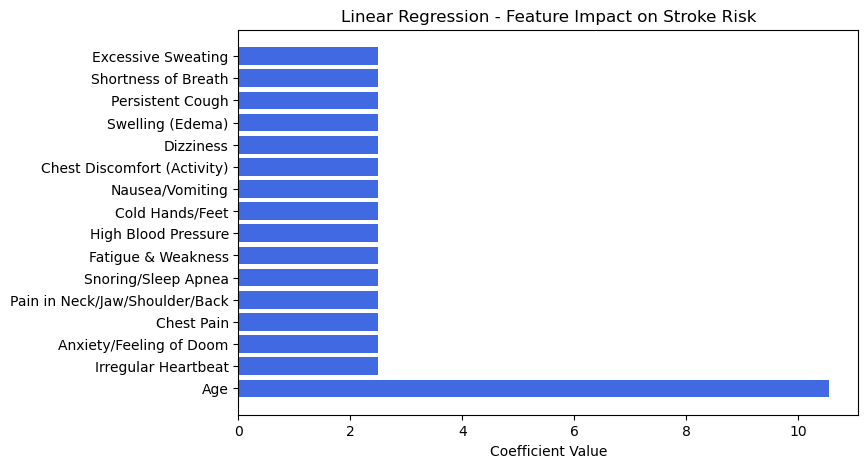

In [66]:
# Extract feature coefficients
coef = pipeline_lr.named_steps["model"].coef_

# Flatten the coefficients array if necessary
if coef.ndim > 1:
    coef = coef.flatten()

# Ensure the lengths of X_lin.columns and coef are the same
if len(X.columns) != len(coef):
    raise ValueError("The number of features and coefficients do not match.")

# Create a DataFrame for visualization
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": coef})
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

# Plot coefficients
plt.figure(figsize=(8,5))
plt.barh(coef_df["Feature"], coef_df["Coefficient"], color="royalblue")
plt.xlabel("Coefficient Value")
plt.title("Linear Regression - Feature Impact on Stroke Risk")
plt.show()

### Decision to drop age as a feature

While keeping the variable age in our models could resulted in high model performance, it also raised concerns about the overreliance on a single variable, reducing the interpretability and clinical utility of the model.

For this reason we decided to **drop age** as a feature and evaluate models that focus exclusively on **symptom patterns**. This allows for a fairer assessment of stroke risk based on medical signs rather than demographic factors. While this may reduce overall model accuracy, it forces the algorithm to learn from **health-related variables**, ensuring that predictions are more clinically meaningful.

## Random forest regression

By leveraging the power of multiple decision trees, the Random Forest model is particularly well-suited for capturing complex relationships between symptoms, making it an ideal choice after we removed age as a predictive variable. 

Unlike simpler models that rely on linear assumptions, Random Forest can uncover non-linear patterns and interactions between medical features, ensuring that stroke risk predictions are driven by a broader set of clinical indicators rather than a single dominant factor. 

The optimized Random Forest Regressor, trained without age as a feature, shows a Mean Squared Error (MSE) of 117.55 and an R² score of 0.4172. While this reduction in performance was expected, the revised model is now forced to rely on symptom-based patterns, making it potentially more clinically useful in scenarios where age information is unavailable or less relevant. The next step is to analyze the feature importance rankings and model errors to determine which symptoms contribute most to stroke risk estimation in the absence of age.

In [68]:
df_rf = df.copy()
X = df_rf.drop(columns=[ "Age","Stroke Risk (%)", "At Risk (Binary)", "Age Scaled Stroke Risk", "Number of Symptoms", "KMeans_Cluster", "Age Group" ])
y = df_rf["Stroke Risk (%)"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the pipeline (Scaling + Random Forest)
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # Scale numerical features
    ('model', RandomForestRegressor(random_state=42))  # Model to tune
])

# Define hyperparameter search space
param_dist = {
    'model__n_estimators': [50, 100, 200, 300],  # Number of trees
    'model__max_depth': [None, 10, 20, 30],  # Tree depth
    'model__min_samples_split': [2, 5, 10],  # Min samples to split a node
    'model__min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    'model__bootstrap': [True, False]  # Sampling method
}

# Run Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_dist,
    n_iter=5,  # Number of random combinations
    cv=2,  # 3-fold cross-validation
    scoring='r2',  # Optimize for R² Score
    random_state=42,
    n_jobs=1  # Use all processors
)

# Train the best model
random_search.fit(X_train, y_train)
best_pipeline_rf = random_search.best_estimator_

# Predict on test data
y_pred_rf = best_pipeline_rf.predict(X_test)

# Evaluate the optimized model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Best Parameters:", random_search.best_params_)
print(f"Optimized Model - Mean Squared Error: {mse_rf:.2f}")
print(f"Optimized Model - R² Score: {r2_rf:.4f}")


Best Parameters: {'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_depth': 10, 'model__bootstrap': True}
Optimized Model - Mean Squared Error: 117.55
Optimized Model - R² Score: 0.4172


The feature importance rankings show a more balanced distribution among symptoms, with chest pain, fatigue & weakness, and high blood pressure emerging as the most influential predictors of stroke risk. This shift suggests that the model now relies more on cardiovascular and symptom-based indicators rather than demographic factors. 

Additionally, features such as snoring/sleep apnea, shortness of breath, and cold hands/feet also contribute significantly, indicating that the model captures a broader spectrum of clinical warning signs. 

Unlike the age-driven model, where a single variable dominated predictions, this approach ensures that multiple symptoms collectively influence risk assessment, making the model more interpretable and clinically relevant for identifying high-risk patients based on their presenting symptoms.

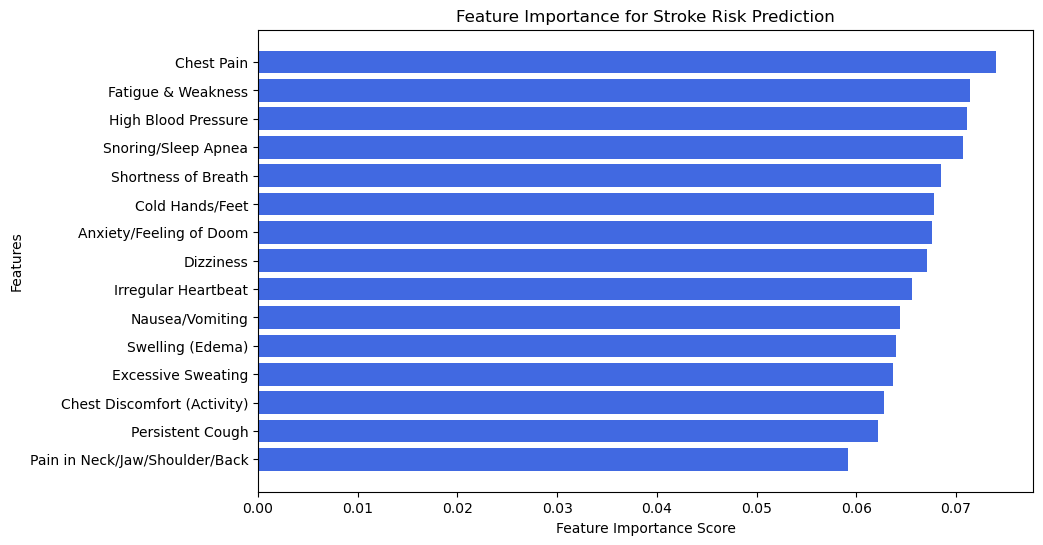

In [70]:
# Extract the best trained model from the tuned pipeline
rf_model = best_pipeline_rf.named_steps["model"]

# Get feature importances
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx], color="royalblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Stroke Risk Prediction")
plt.gca().invert_yaxis()  # Invert y-axis to show most important first
plt.show()

The LIME model helps us understand how individual features influence stroke risk predictions for a specific patient. Unlike feature importance rankings, which provide a global view of the model, LIME offers a case-by-case breakdown, highlighting which symptoms contributed the most to a particular prediction.

For User 19, the model identified chest pain, snoring/sleep apnea, shortness of breath and fatigue & weakness as the most significant factors increasing stroke risk, as indicated by the positive green bars. This suggests that for this individual, these symptoms had a strong positive influence, pushing the predicted stroke risk higher. Conversely, the lack ofhigh blood pressure  had a negative impact on the prediction (red bar), meaning that in this case, it contributed to lowering the estimated stroke risk.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Figure size 600x400 with 0 Axes>

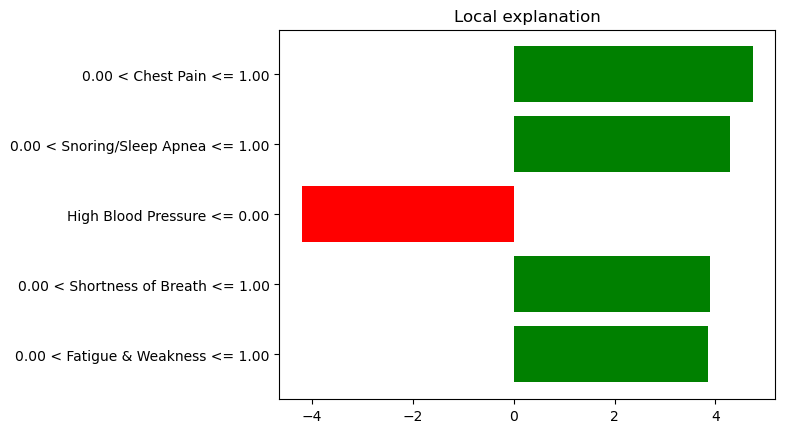

In [77]:
#  Initialize LIME Explainer (Set to Regression Mode)
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # Convert to NumPy
    feature_names=X_train.columns.tolist(),  # Ensure correct feature names
    mode='regression'  # Set to 'regression' for continuous output
)

# Select an Instance to Explain
instance_index = 19  # Choose an instance from X_test
instance = X_test.iloc[instance_index].values  # Convert row to NumPy array

# Generate LIME Explanation
lime_exp = explainer_lime.explain_instance(
    data_row=instance,  
    predict_fn=best_pipeline_rf.predict,  # Use best trained Random Forest model
    num_features=5  # Show top 5 most influential features
)

# Plot LIME Explanation for Stroke Risk Prediction
plt.figure(figsize=(6, 4))  # Adjust figure size
lime_exp.as_pyplot_figure()  # Show explanation
plt.show()

# 5. Classification Models

In [79]:
# Remove the column "Stroke Risk (%)"
df_cleaned = df.drop(columns=["Stroke Risk (%)", "Age","Stroke Risk (%)", "Age Scaled Stroke Risk", "Number of Symptoms", "KMeans_Cluster", "Age Group" ])

# Split the data into features (X) and target (y)
y = df_cleaned["At Risk (Binary)"]
X = df_cleaned.drop(columns=["At Risk (Binary)"])  # Assuming "Stroke" is the target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## BaseLine Model- Logistic Regression

Unlike linear regression, **logistic regression** is specifically designed for classification tasks, making it well-suited for predicting binary outcomes such as stroke risk. One key advantage is its **interpretable coefficients**, which allow the task force to understand the contribution of each **symptom** to the final prediction. This transparency is particularly valuable in medical decision-making, where understanding risk factors is as important as achieving high accuracy.

Moreover, **logistic regression is computationally efficient** and requires minimal tuning compared to more complex models. Its simplicity makes it an ideal **baseline model**, providing a reference point before exploring more sophisticated techniques.

### Strategic Choices in Hyperparameter Tuning and Evaluation  

We use a **lighter hyperparameter tuning** approach with **Randomized Search CV** to balance **efficiency and performance**, as logistic regression is relatively simple and does not require extensive tuning. By limiting `n_iter=10`, we explore meaningful variations in **regularization strength (`C`) and penalty types (`L1/L2`)** without excessive computation.  

We optimize for **recall** because the goal is to **prioritize early detection of stroke risk based on symptoms**. Even though the dataset is **balanced**, missing a high-risk case could still lead to serious consequences. By favoring recall, we ensure that the model is **sensitive to identifying potential stroke cases**, even if it slightly increases false positives.


Best Parameters from Randomized Search: {'C': 37.455011884736244, 'max_iter': 448, 'penalty': 'l1', 'solver': 'liblinear'}


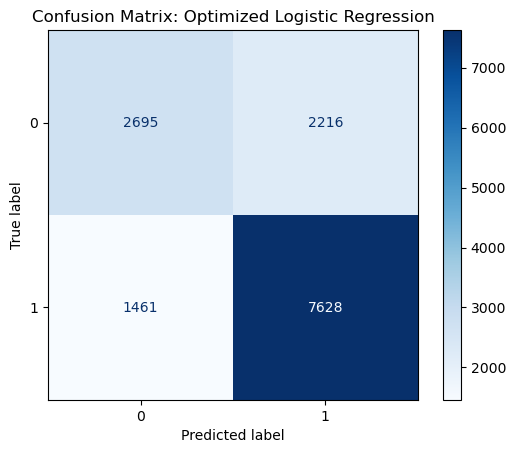

In [81]:
# Define the parameter distributions for hyperparameter tuning
param_distributions = {
    'C': uniform(0.001, 100),  # Continuous range for the regularization strength (C), sampled from 0.001 to 100
    'penalty': ['l1', 'l2'],  # Regularization type: L1 (Lasso) or L2 (Ridge)
    'solver': ['liblinear'],  # 'liblinear' is chosen as it supports both L1 and L2 regularization
    'max_iter': randint(100, 500)  # Number of maximum iterations, sampled between 100 and 500
}

# Initialize a logistic regression model with a fixed random state for reproducibility
log_reg = LogisticRegression(random_state=42)

# Perform Randomized Search with Cross-Validation to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=log_reg,  # Model to tune
    param_distributions=param_distributions,  # Search space for hyperparameters
    n_iter=10,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='recall',  # Evaluate models based on recall
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    random_state=42  # Ensure reproducibility
)

# Fit the randomized search to find the best hyperparameters
random_search.fit(X_train, y_train)

# Retrieve and display the best hyperparameters found during tuning
best_params = random_search.best_params_
print("\nBest Parameters from Randomized Search:", best_params)

# Train a new logistic regression model using the best hyperparameters found
best_logistic_model = LogisticRegression(**best_params, random_state=42)
best_logistic_model.fit(X_train, y_train)

# Generate predictions using the optimized logistic regression model
y_pred_best = best_logistic_model.predict(X_test)

# Compute the confusion matrix for the optimized model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix using a heatmap
disp_best = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best, display_labels=[0, 1])
disp_best.plot(cmap='Blues')
plt.title('Confusion Matrix: Optimized Logistic Regression')
plt.show()

In [83]:
# Classification Report for Logistic Regression
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_best))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.65      0.55      0.59      4911
           1       0.77      0.84      0.81      9089

    accuracy                           0.74     14000
   macro avg       0.71      0.69      0.70     14000
weighted avg       0.73      0.74      0.73     14000



### Model Accuracy

The model achieves **high recall (0.84) for class 1 (at-risk cases)**, meaning it effectively identifies most individuals at risk of stroke. However, the **precision for class 0 (non-risk) is lower (0.65)**, indicating that the model tends to misclassify some non-risk cases as high risk, prioritizing **sensitivity over specificity**.

In [85]:
# Compute VIF for each feature
X_vif = X_train.copy()  # Use the training set only
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

# Display features with high VIF
vif_data.head(20)

,Feature,VIF
0,Chest Pain,1.885768
1,Shortness of Breath,1.862753
2,Irregular Heartbeat,1.869480
3,Fatigue & Weakness,1.874265
4,Dizziness,1.885745
5,Swelling (Edema),1.874161
6,Pain in Neck/Jaw/Shoulder/Back,1.875487
7,Excessive Sweating,1.888289
8,Persistent Cough,1.876179
9,Nausea/Vomiting,1.880036


In [87]:
# Create a copy of X_train to avoid modifying the original dataset
X_train_const = X_train.copy()

# Add an intercept (constant term) to the feature matrix for the logistic regression model
X_train_const = sm.add_constant(X_train_const)

# Initialize and fit a logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Display the model summary, including coefficients, p-values, and other statistical metrics
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.503184
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       At Risk (Binary)   No. Observations:                56000
Model:                          Logit   Df Residuals:                    55984
Method:                           MLE   Df Model:                           15
Date:                Sun, 23 Mar 2025   Pseudo R-squ.:                  0.2234
Time:                        19:18:46   Log-Likelihood:                -28178.
converged:                       True   LL-Null:                       -36285.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.6265      0.050    -91.899     

In [89]:
# Extract coefficients from the statsmodels logistic regression result
coefficients = result.params

# Compute odds ratios
odds_ratios = np.exp(result.params)

# Create a DataFrame for coefficients and odds ratios
coef_df = pd.DataFrame({"Feature": coefficients.index, "Coefficient": coefficients.values, "Odds Ratio": odds_ratios.values})

# Display the DataFrame
coef_df.head(20)

,Feature,Coefficient,Odds Ratio
0,const,-4.626490,0.009789
1,Chest Pain,0.743212,2.102678
2,Shortness of Breath,0.729139,2.073295
3,Irregular Heartbeat,0.687451,1.988640
4,Fatigue & Weakness,0.746567,2.109745
5,Dizziness,0.732358,2.079980
6,Swelling (Edema),0.696529,2.006775
7,Pain in Neck/Jaw/Shoulder/Back,0.677151,1.968262
8,Excessive Sweating,0.772086,2.164277
9,Persistent Cough,0.744838,2.106099


### Model Interpretation

- The **Variance Inflation Factor (VIF) values** are all below 2, indicating that **multicollinearity is not a concern** in the model. This suggests that the symptoms included as predictors are independent enough to provide distinct contributions to stroke risk prediction.  

- All **regression coefficients (betas) are positive and statistically significant (p < 0.001)**, meaning that the presence of each symptom **increases the probability of stroke risk**. Symptoms such as **chest pain (0.743), shortness of breath (0.729), and excessive sweating (0.772)** have strong predictive power, reinforcing their clinical importance. The model's **pseudo R-squared (0.2234)** suggests a meaningful level of explanatory power, though additional factors may influence stroke risk beyond the included symptoms.  

- The **odds ratios**, derived by exponentiating the coefficients, indicate the factor by which the odds of stroke increase when a particular symptom is present. For example, **chest pain (OR = 2.10)** means that individuals experiencing chest pain are **2.1 times more likely** to be classified as at risk compared to those without it, holding other symptoms constant. Similarly, **excessive sweating (OR = 2.16)** and **fatigue & weakness (OR = 2.11)** are among the strongest predictors, each more than **doubling the odds** of being at risk.  

These results confirm that stroke risk is **highly correlated with symptom severity**, emphasizing the importance of monitoring and early intervention for individuals displaying multiple symptoms.

In [91]:
# Ensure age groups are correctly assigned for the test set
age_groups_test = pd.cut(
    df.loc[y_test.index, "Age"],  # Use the original dataset to extract Age
    bins=[0,40,60,80, 100],  
    labels=["<40", "40-60", "60-80","80+"]
)

# Compute fairness metrics across age groups
metric_frame = MetricFrame(
    metrics={"accuracy": accuracy_score, "precision": precision_score, "recall": recall_score},
    y_true=y_test,
    y_pred=best_logistic_model.predict(X_test),
    sensitive_features=age_groups_test
)

# Display fairness metrics by age group
print("\nFairness Metrics Across Age Groups:")
print(metric_frame.by_group)


Fairness Metrics Across Age Groups:
       accuracy  precision    recall
Age                                 
40-60  0.917713   0.910015  0.972245
60-80  0.779767   1.000000  0.761249
80+    0.717922   1.000000  0.714211
<40    0.558410   0.367157  1.000000


### Fairness Evaluation Across Age Groups  

We use **Fairlearn’s MetricFrame** to analyze how the model performs across different **age groups**, focusing on **accuracy, precision, and recall**. This helps identify whether the model systematically favors or disadvantages certain age demographics.  

The results show that **recall decreases with age**: for individuals **80+**, recall drops to **0.71**, meaning a larger proportion of actual stroke-risk cases in this group are **misclassified as low risk**. One possible explanation is that **older individuals often exhibit multiple symptoms due to aging-related conditions**, which may not always be directly linked to stroke. This could cause the model to rely more on symptom severity patterns seen in younger individuals, making it less sensitive to identifying high-risk cases in older populations.  

By assessing fairness metrics across age groups, we can **ensure that the model is not disproportionately underperforming for specific demographics**. If recall disparities persist, adjustments such as **reweighting the training data** or **calibrating decision thresholds for different age groups** could be explored to mitigate these effects.

## Random Forest 

### Random Forest Choice and Assumptions  

Random Forest was selected for its **robustness to non-linearity and interactions between symptoms**, making it a strong alternative to logistic regression. The hyperparameter search prioritizes **efficiency**, reducing model complexity to prevent overfitting while optimizing for **recall** to ensure high sensitivity in stroke risk detection.

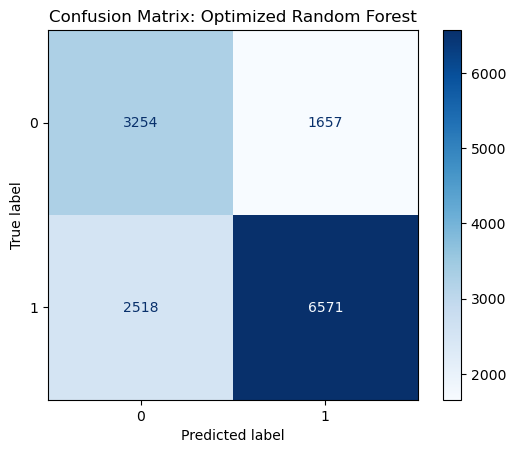

Best Hyperparameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 199}


In [97]:
# Define a more efficient hyperparameter distribution
rf_param_dist = {
    'n_estimators': randint(50, 200),  # Fewer trees for faster computation
    'max_depth': [10, 15],  # Limit depth to prevent overly complex trees
    'min_samples_split': [2, 5],  # Reduce search space for splits
    'min_samples_leaf': [1, 3],  # Avoid very small leaf sizes
    'max_features': ['sqrt'],  # Use only square root to speed up training
    'bootstrap': [True]  # Always use bootstrapping for efficiency
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")

# Perform Randomized Search with Cross-Validation
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,  
    param_distributions=rf_param_dist,  
    n_iter=5,  # Fewer iterations to reduce training time
    cv=3,  # Reduce cross-validation folds
    scoring='recall',  # Optimize for recall
    n_jobs=-1,  # Use all CPU cores
    random_state=42  
)

# Fit the model to training data
rf_random_search.fit(X_train, y_train)

# Retrieve the best RF model found
best_rf_model = rf_random_search.best_estimator_

# Generate predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Compute and display the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(conf_matrix_rf, display_labels=[0, 1])
disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix: Optimized Random Forest')
plt.show()

# Display the best hyperparameters found
print("Best Hyperparameters:", rf_random_search.best_params_)

In [99]:
# Classification Report Random Forest 
print("Classification Report: Optimized Random Forest")
print(classification_report(y_test, y_pred_rf))

Classification Report: Optimized Random Forest
              precision    recall  f1-score   support

           0       0.56      0.66      0.61      4911
           1       0.80      0.72      0.76      9089

    accuracy                           0.70     14000
   macro avg       0.68      0.69      0.68     14000
weighted avg       0.72      0.70      0.71     14000



### Model Accuracy

The **Random Forest model** achieves a recall of **0.76 for high-risk cases**, slightly lower than logistic regression, but it improves precision for class 0 (non-risk) from **0.65 to 0.56**, reducing false positives. However, the overall **accuracy (0.70) and F1-scores suggest a trade-off** between sensitivity and specificity, making model selection dependent on risk tolerance.

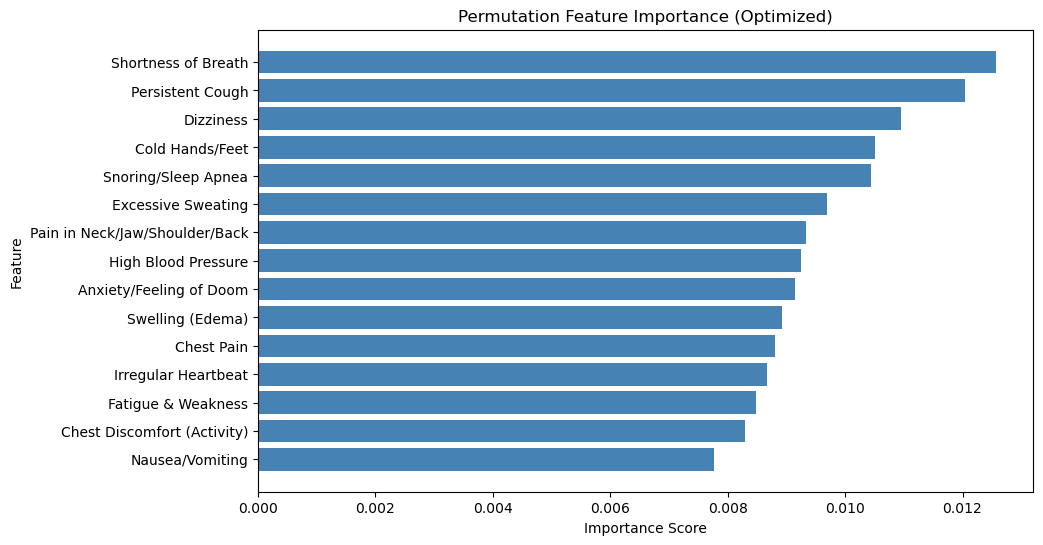

In [101]:
# Compute permutation importance with speed optimizations
perm_importance = permutation_importance(
    best_rf_model, X_test, y_test,  # Use sampled test data for efficiency
    scoring='recall',  # Optimize for recall
    n_repeats=15,  # Number of feature swaps
    random_state=42,
    n_jobs=-1  # Parallel processing, for efficiency
)

# Convert results to DataFrame
perm_imp_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance.importances_mean}) #get the mean imporatnce returned by the function


# Sort by importance
perm_imp_df = perm_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(perm_imp_df['Feature'], perm_imp_df['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance (Optimized)')
plt.gca().invert_yaxis()
plt.show()

### Interpretation of Permutation Feature Importance  

The permutation importance plot shows that **shortness of breath, persistent cough, and dizziness** are the most influential features in predicting stroke risk. These features, when shuffled, significantly reduce the model's recall, indicating that they play a critical role in classification. The importance scores were computed performing **15 random swaps (permutations) per feature**, measuring how much recall changed on average. Features with **higher scores** have a greater impact on model performance, while lower-ranked features, like **nausea/vomiting**, contribute less to predictions. This method ensures that feature rankings reflect their true predictive value rather than just model artifacts.


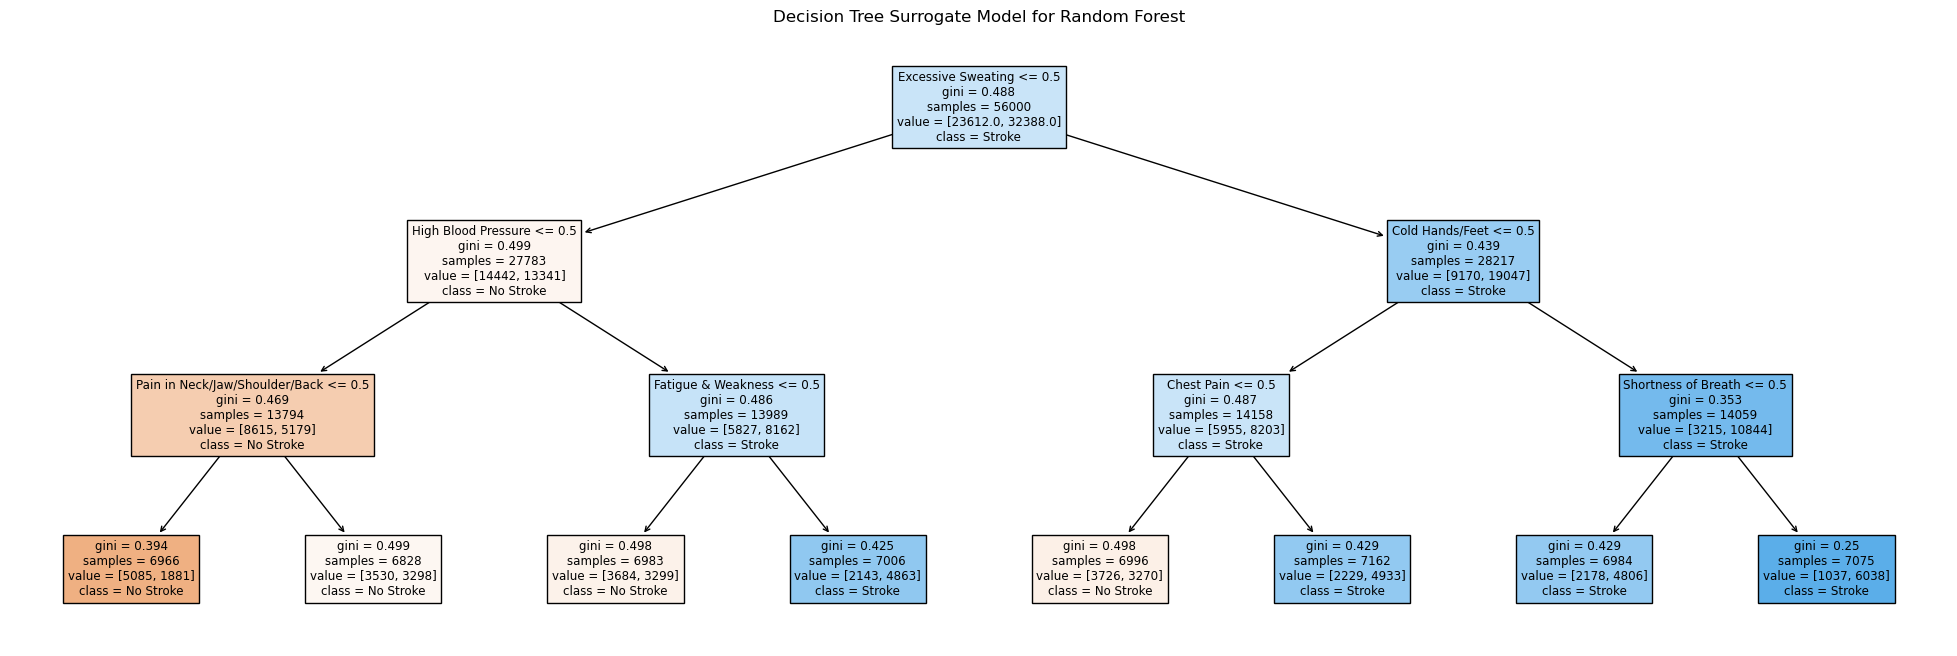

In [103]:
# Generate Predictions (for training the Surrogate Model)
rf_preds = best_rf_model.predict(X_train)  # Ensure predictions are made on the same scale

# Train a Surrogate Model (Decision Tree)
surrogate_model = DecisionTreeClassifier(criterion="gini",max_depth=3, random_state=42)  # Shallow tree for better interpretability
surrogate_model.fit(X_train, rf_preds)  # Train using original input features but RF predictions as labels

# Visualize the Decision Tree (Surrogate Model)
plt.figure(figsize=(25, 8))
plot_tree(surrogate_model, feature_names=X_train.columns, class_names=["No Stroke", "Stroke"], filled=True)
plt.title("Decision Tree Surrogate Model for Random Forest")
plt.show()

### Interpretation of the Surrogate Decision Tree  

This **surrogate decision tree** is trained to mimic the predictions of the **Random Forest model**, providing a more interpretable approximation of its decision-making process. The tree splits first on **Excessive Sweating**, suggesting that this feature has a strong influence on stroke risk classification. Subsequent splits on **High Blood Pressure and Cold Hands/Feet** indicate additional key risk factors. The **Gini impurity criterion** was used to build the tree, which measures the purity of splits—lower Gini values indicate more homogeneous groups. While a **shallow tree (max_depth=3)** helps with explainability, it is only an approximation of the more complex **Random Forest model**, which considers multiple deep decision paths.

### Explanation of the Decision Tree Node  

- **Excessive Sweating <= 0.5** → This is the decision rule at this node. If **Excessive Sweating is 0 (absent)**, the decision follows the **left branch**; otherwise, it follows the **right branch**.
- **gini = 0.488** → The **Gini impurity score** at this node, which measures how mixed the classes are. A value closer to **0** means purer groups, while **0.5** indicates a nearly even class split.
- **samples = 56,000** → The **total number of training samples** reaching this node.
- **value = [23,612, 32,388]** → The count of samples in each class: **23,612 "No Stroke" cases (Class 0)** and **32,388 "Stroke" cases (Class 1)**.
- **class = Stroke** → The majority class at this node is **Stroke (Class 1)**, meaning most samples at this stage are predicted as stroke-risk individuals.


## Gradient Boost

### Gradient Boosting Choice 

Gradient Boosting was chosen as a **third model** to balance **interpretability, predictive power, and flexibility**. Unlike Random Forest, which builds trees independently, Gradient Boosting **sequentially improves weak learners**, optimizing for recall by reducing false negatives. The hyperparameter search is **simplified** to limit training time while maintaining model performance, using **fewer boosting stages (`n_estimators`) and restricted tree depth (`max_depth`)** to prevent overfitting. 

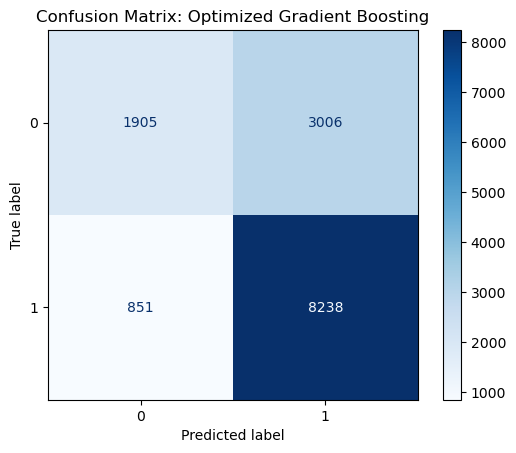

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 64, 'subsample': 0.8}


In [105]:
# Define a simplified hyperparameter distribution
gbm_param_dist = {
    'n_estimators': randint(50, 200),  # Fewer boosting stages to reduce training time
    'learning_rate': [0.05, 0.1],  # Only two options for step size
    'max_depth': [3, 5],  # Limit max depth to prevent complex trees
    'min_samples_split': [2, 5],  # Reduce options for splitting criteria
    'subsample': [0.8, 1.0]  # Slight stochasticity for regularization
}

# Initialize the Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)

# Perform Randomized Search with Cross-Validation
gbm_random_search = RandomizedSearchCV(
    estimator=gbm_model,  
    param_distributions=gbm_param_dist,  
    n_iter=5,  # Reduce iterations to speed up search
    cv=3,  # Reduce cross-validation folds
    scoring='recall',  
    n_jobs=-1,  
    random_state=42  
)

# Fit the model to training data
gbm_random_search.fit(X_train, y_train)

# Retrieve the best GBM model found
best_gbm_model = gbm_random_search.best_estimator_

# Generate predictions on the test set
y_pred_gbm = best_gbm_model.predict(X_test)

# Compute and display the confusion matrix
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
disp_gbm = ConfusionMatrixDisplay(conf_matrix_gbm, display_labels=[0, 1])
disp_gbm.plot(cmap='Blues')
plt.title('Confusion Matrix: Optimized Gradient Boosting')
plt.show()

# Display the best hyperparameters found
print("Best Hyperparameters:", gbm_random_search.best_params_)

In [107]:
# Generate classification report for the optimized Gradient Boosting model
gbm_report = classification_report(y_test, y_pred_gbm)

# Display the report
print("Classification Report: Gradient Boosting Model")
print(gbm_report)

Classification Report: Gradient Boosting Model
              precision    recall  f1-score   support

           0       0.69      0.39      0.50      4911
           1       0.73      0.91      0.81      9089

    accuracy                           0.72     14000
   macro avg       0.71      0.65      0.65     14000
weighted avg       0.72      0.72      0.70     14000



### Results  

The **Gradient Boosting model** achieves the **highest recall (0.91) for stroke cases**, making it the most effective at identifying at-risk individuals. However, it struggles with **class 0 (non-stroke)**, with **a recall of only 0.39**, meaning many non-stroke cases are misclassified as high risk. This trade-off favors **sensitivity over specificity**, which is useful in a **high-risk medical setting** but may lead to unnecessary interventions. The overall **accuracy (0.72) and weighted F1-score (0.70)** indicate balanced performance, though further tuning could improve precision without sacrificing recall.


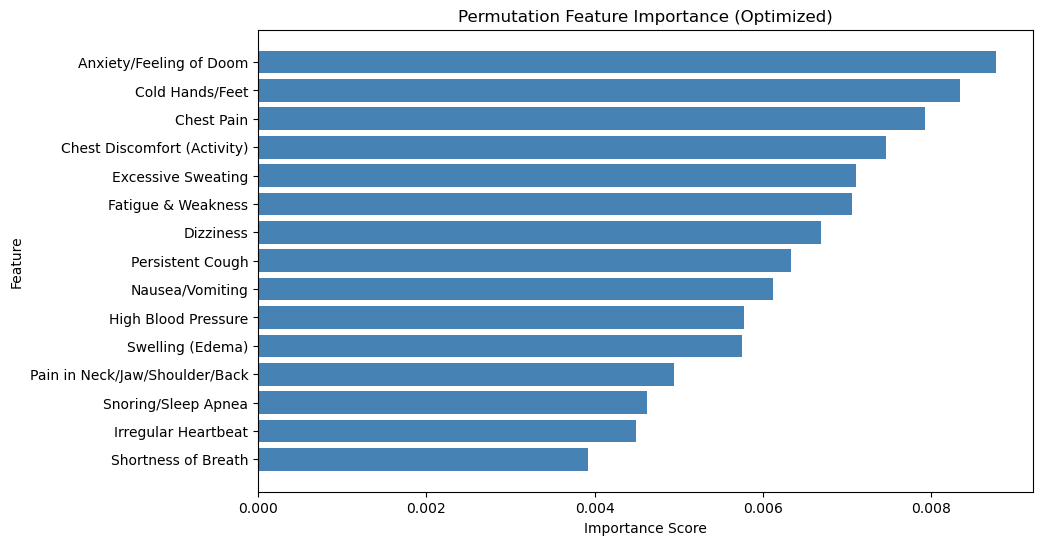

In [109]:
# Compute permutation importance with speed optimizations
perm_importance = permutation_importance(
    best_gbm_model, X_test, y_test,  # Use sampled test data for efficiency
    scoring='recall',  # Optimize for recall
    n_repeats=15,  # Number of feature swaps
    random_state=42,
    n_jobs=-1  # Parallel processing, for efficiency
)

# Convert results to DataFrame
perm_imp_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': perm_importance.importances_mean}) #get the mean imporatnce returned by the function


# Sort by importance
perm_imp_df = perm_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(perm_imp_df['Feature'], perm_imp_df['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance (Optimized)')
plt.gca().invert_yaxis()
plt.show()

### Permutation Feature Importance Interpretation  

The **Gradient Boosting model** ranks **Anxiety/Feeling of Doom, Chest Pain, and Cold Hands/Feet** as the most influential features in predicting stroke risk. These symptoms, when randomly shuffled, significantly decrease the model’s recall, indicating their strong predictive power. Interestingly, **Shortness of Breath and Irregular Heartbeat show small importance**, suggesting they may contribute little to the model’s decision-making or introduce noise. This analysis highlights how Gradient Boosting captures **non-obvious relationships** between symptoms, offering a different perspective compared to traditional clinical expectations.


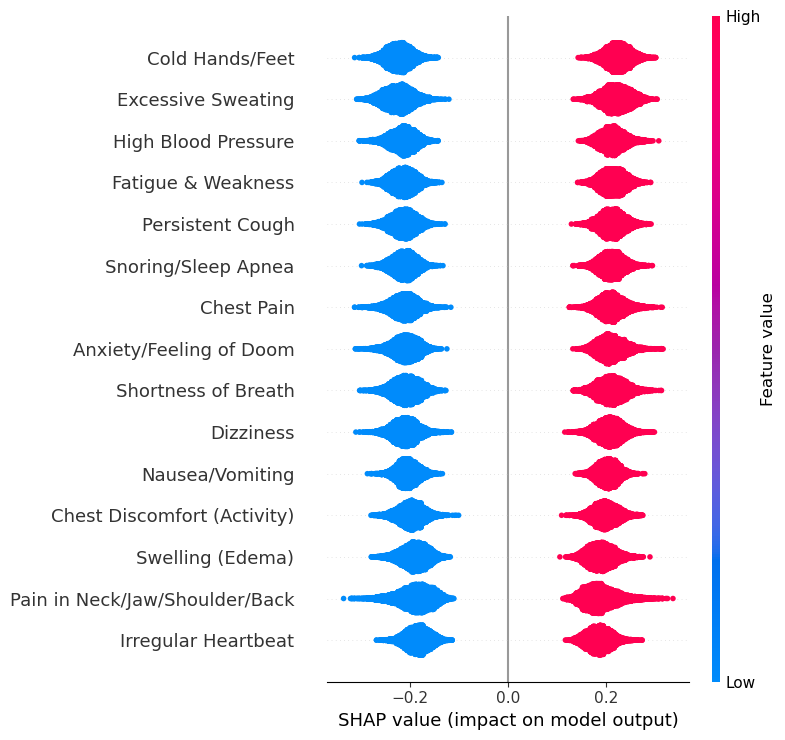

In [111]:
# Initialize SHAP TreeExplainer for the Gradient Boosting model
explainer = shap.TreeExplainer(best_gbm_model)

# Compute SHAP values for the sampled data
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test)

### SHAP Summary Plot Interpretation  

The SHAP summary plot shows the impact of each feature on the model's predictions, with **Cold Hands/Feet, Excessive Sweating, and High Blood Pressure** having the most significant influence on stroke risk. Each dot represents a sample, with **red indicating high feature values and blue indicating low values**. A positive SHAP value means the feature increases stroke risk, while a negative value decreases it. The density of points around zero suggests some features contribute minimally, while others exhibit strong directional influence. This insight helps interpret **how symptoms drive the model's decisions**, aiding in clinical validation.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


<Figure size 600x400 with 0 Axes>

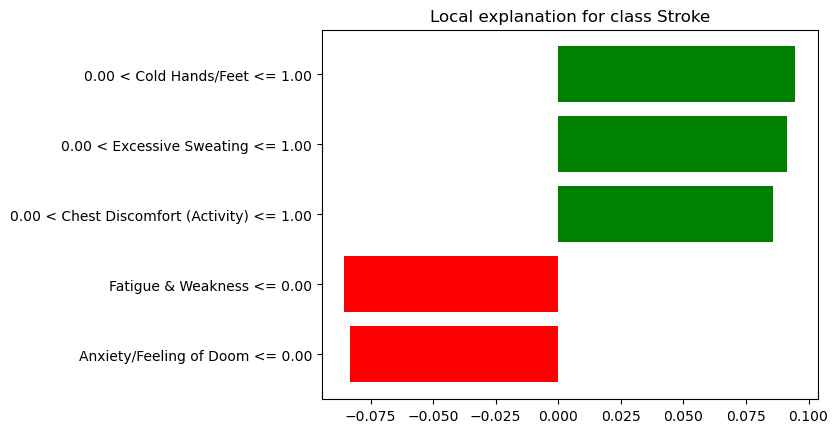

In [113]:
# Initialize LIME Explainer (Ensure Correct Data Format)
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # Convert to NumPy to avoid Pandas warnings
    feature_names=X_train.columns.tolist(),  # Ensure correct feature names
    class_names=["No Stroke", "Stroke"],  # Update class labels as needed
    mode='classification'
)

#  Select an Instance to Explain
instance_index = 19  # Choose an instance from X_test
instance = X_test.iloc[instance_index].values  # Convert row to NumPy array

# Generate LIME Explanation
lime_exp = explainer_lime.explain_instance(
    data_row=instance,  
    predict_fn=best_gbm_model.predict_proba,  
    num_features=5  # Show top 5 most influential features
)
# Plot LIME Explanation for Class 1 (Stroke)
plt.figure(figsize=(6, 4))  # Optional: Adjust figure size
lime_exp.as_pyplot_figure(label=1)  # Show only class 1 explanation
plt.show()

In [115]:
# Predict class probabilities for the selected instance
probs = best_gbm_model.predict_proba([X_test.iloc[19]])
print(f"Predicted probabilities: {probs}")

Predicted probabilities: [[0.14089838 0.85910162]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


### LIME Explanation for Stroke Prediction  

This **LIME (Local Interpretable Model-agnostic Explanations) plot** provides a local explanation for a single instance classified as **stroke risk**. The **green bars** represent features that **increase the likelihood of stroke**, with **Cold Hands/Feet, Excessive Sweating, and Chest Disconfort (Activity)** contributing positively to the decision. In contrast, **Fatigue & Weakness and Anxiety/Feeling of Doom** has a **negative impact**, meaning its absence made the model less confident in predicting stroke. The predicted probability for stroke (**0.86**) suggests high model confidence. LIME helps interpret how individual symptoms influence the decision, making it useful for understanding **case-specific predictions** in medical settings.

# 6. Takeways and Recommendations

### Model Comparison and Justification
The decision to **drop age** was made to analyze the predictive power of other symptoms without age dominating the model. While age is strongly correlated with stroke risk, including it **overwhelms other clinical factors**, leading to near-perfect predictions but reducing the importance of specific symptoms. By excluding age, the models focus on identifying key warning signs independent of demographic bias**, making the results more actionable for early detection.  

In stroke risk prediction for insurance, **optimizing for recall** is crucial. High recall ensures most high-risk individuals are correctly identified, helping insurers avoid costly false negatives — cases where at-risk clients are misclassified and incur future medical expenses.

A naive strategy, such as flagging all individuals with a predicted risk above 65%, may seem practical but is flawed. It imposes an arbitrary threshold and ignores the model's performance across the risk spectrum. A **dedicated classification model** better captures the complexity of the data and aligns with business priorities by balancing recall, precision, and overall risk prediction.
 
Three models were evaluated: **Logistic Regression, Random Forest, and Gradient Boosting**. Logistic Regression, while interpretable, had limited predictive power. Random Forest performed well but lacked sensitivity in certain cases. **Gradient Boosting emerged as the best model**, achieving the highest **recall (0.91)** for stroke cases, which is critical in a high-risk medical setting. Although it misclassified some non-stroke cases (lower specificity), its ability to **detect more true strokes** makes it the most suitable for deployment where early intervention is a priority.

The company should maintain the Random Forest regression model to continuously estimate stroke risk as a percentage, enabling dynamic risk monitoring and more granular decision-making.


### Key Features Impacting Stroke Risk

Based on the SHAP analysis and multiple permutation-based feature importance plots, several features consistently emerge as the most impactful in predicting stroke risk across models. **Chest pain**, **fatigue & weakness**, **high blood pressure**, and **shortness of breath** are among the top-ranked variables in nearly all visualizations. These symptoms are medically aligned with cardiovascular stress and neurological warning signs, reinforcing their importance from both data-driven and clinical perspectives. Additionally, **cold hands/feet**, **anxiety or feeling of doom**, and **dizziness** also appear repeatedly among the most influential predictors. Their consistency across different model interpretations (SHAP values and permutation importance) highlights their robust predictive value, making them essential variables for both classification and continuous risk estimation strategies.

However, even though certain features appear repeatedly at the top, **no single variable—aside from age—demonstrates overwhelmingly dominant predictive power** when compared to others. The relative importance scores tend to be relatively close across most features, indicating that stroke risk is driven by a **combination of symptoms and not a single determinant**. Therefore, the company should **avoid over-prioritizing any individual symptom** in risk assessments or decision-making processes. A holistic, multivariate approach remains the most appropriate strategy for capturing stroke risk effectively.


### Data Modelling Recommendations

1. **Avoid Rigid Thresholding for Risk Classification**  
   Rather than labeling clients as “risky” based on a fixed threshold (e.g., 65% predicted risk), use a trained classifier that accounts for feature interactions and model calibration. This ensures more consistent and explainable decision-making.

2. **Adopt a Holistic Approach to Risk Features**  
   While certain symptoms (e.g., chest pain, high blood pressure) appear frequently among top predictors, no single feature—except for age—dominates the prediction.

3. **Incorporate Explainability Tools into Decision Pipelines**  
   Tools such as SHAP can help interpret individual predictions, increasing transparency and building trust with both underwriters and clients.

4. **Regularly Retrain and Validate Models**  
   Stroke risk factors and data distributions may change over time. The company should implement a regular retraining schedule and monitor model drift to maintain predictive performance and fairness.



### Business Insights

1. **Early Detection Can Drive Cost Savings**  
   Clients showing symptoms such as chest pain, high blood pressure, or fatigue—especially when combined—represent elevated stroke risk. Proactively identifying these individuals allows the insurer to recommend preventive care, reducing the likelihood of expensive claims down the line.

2. **Personalized Premiums and Preventive Programs**  
   The continuous risk scores from the regression model can support tiered insurance products. Clients with moderate risk may benefit from personalized wellness programs or reduced premiums if they participate in preventive initiatives, creating a win-win for both the insurer and the insured.

3. **Broaden Risk Assessment Beyond Traditional Metrics**  
   While age is a strong predictor, relying solely on demographic factors is insufficient. Many physiological and behavioral symptoms—often underreported in traditional risk evaluations—carry predictive value and should be included in underwriting and client assessments.

4. **Improved Customer Engagement Through Explainability**  
   Using tools like SHAP values, the company can provide clients with personalized explanations of their health risk. This increases transparency, encourages trust, and can motivate individuals to adopt healthier behaviors when they understand which specific symptoms are driving their risk.

5. **Partner with Healthcare Providers for Preventive Interventions**  
   Collaborate with clinics and telemedicine platforms to offer regular check-ups or remote monitoring for high-risk clients identified by the model. This proactive approach can reduce the incidence and cost of major stroke events.

